### Satellite imagery EDA using Rasterio

In [25]:
# necessary installations to run this notebook to be aware of: rasterio

In [1]:
import pandas as pd
import numpy as np

import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

### ml-HFI TIFF - AOI Subset only

In [2]:
hfi_image_file = "./data/ml_hfi2019.tiff"

mlhfi_image = rasterio.open(hfi_image_file)

In [3]:
mlhfi_image.profile

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': nan, 'width': 1011, 'height': 1011, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.009892734568157886, 0.0, -109.99901015018735,
       0.0, 0.009892734568157886, 29.99711540501361), 'tiled': False, 'interleave': 'band'}

In [4]:
print(mlhfi_image)

# let's look at some basic information about this geoTIFF:

# dataset name
print(mlhfi_image.name)

# number of bands in this dataset
print(mlhfi_image.count)

<open DatasetReader name='./data/ml_hfi2019.tiff' mode='r'>
./data/ml_hfi2019.tiff
1


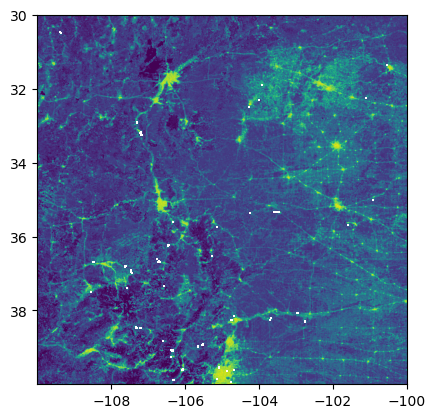

<AxesSubplot: >

In [5]:
show(mlhfi_image)

In [6]:
mlhfi_image.bounds

BoundingBox(left=-109.99901015018735, bottom=39.99867005342123, right=-99.99745550177973, top=29.99711540501361)

In [7]:
mlhfi_image.shape

(1011, 1011)

### HFP Satellite image - full globe

Data from: https://datadryad.org/stash/dataset/doi:10.5061/dryad.3tx95x6d9

In [8]:
hfp_sat_file = "./data/HFP2009.tif"
hfp_sat = rasterio.open(hfp_sat_file)

In [9]:
# satdat is our open dataset object
print(hfp_sat)

# let's look at some basic information about this geoTIFF:

# dataset name
print(hfp_sat.name)

# number of bands in this dataset
print(hfp_sat.count)

<open DatasetReader name='./data/HFP2009.tif' mode='r'>
./data/HFP2009.tif
1


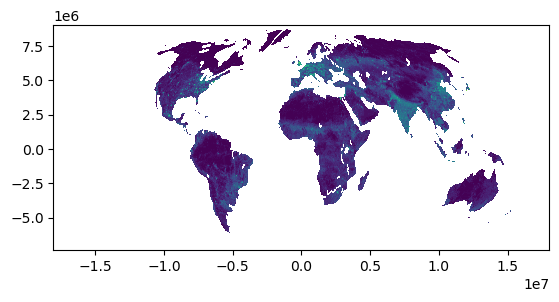

<AxesSubplot: >

In [10]:
show(hfp_sat)

In [12]:
width_in_projected_units = hfp_sat.bounds.right - hfp_sat.bounds.left
height_in_projected_units = hfp_sat.bounds.top - hfp_sat.bounds.bottom

print("Width: {}, Height: {}".format(width_in_projected_units, height_in_projected_units))

Width: 36081000.0, Height: 16382000.0


In [13]:
hfp_sat.crs

CRS.from_wkt('PROJCS["World_Mollweide",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Mollweide"],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [14]:
hfp_sat.profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 36081, 'height': 16382, 'count': 1, 'crs': CRS.from_wkt('PROJCS["World_Mollweide",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Mollweide"],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(1000.0, 0.0, -18040094.09752045,
       0.0, -1000.0, 9018957.052787267), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}

### Satellite global forest change 40N and 110W (the AOI)

Data from: https://earthenginepartners.appspot.com/science-2013-global-forest/download_v1.7.html 

In [30]:
image_file = "./data/Hansen_GFC-2019-v1.7_first_40N_110W.tif"

satdat = rasterio.open(image_file)

In [31]:
satdat.tags()

{'AREA_OR_POINT': 'Area'}

In [32]:
# satdat is our open dataset object
print(satdat)

# let's look at some basic information about this geoTIFF:

# dataset name
print(satdat.name)

# number of bands in this dataset
print(satdat.count)

<open DatasetReader name='./data/Hansen_GFC-2019-v1.7_first_40N_110W.tif' mode='r'>
./data/Hansen_GFC-2019-v1.7_first_40N_110W.tif
4


In [33]:
# The dataset reports a band count.
print(satdat.count)

# And provides a sequence of band indexes.  These are one indexing, not zero indexing like Numpy arrays.
print(satdat.indexes)

4
(1, 2, 3, 4)


In [34]:
# Landsat 4-band band order from Global Forest Change dataset

red, nir, swir5, swir7 = satdat.read()

In [36]:
print(red.dtype)

uint8


In [37]:
type(red)

numpy.ndarray

In [38]:
# using the red band as an example, examine the width & height of the image (in pixels)

w = red.shape[0]
h = red.shape[1]

print("width: {w}, height: {h}".format(w=w, h=h))

width: 40000, height: 40000


In [39]:
# Minimum bounding box in projected units

print(satdat.bounds)

BoundingBox(left=-110.0, bottom=30.0, right=-100.0, top=40.0)


In [40]:
# Get dimensions, in map units (this is in latitude and longitude)

width_in_projected_units = satdat.bounds.right - satdat.bounds.left
height_in_projected_units = satdat.bounds.top - satdat.bounds.bottom

print("Width: {}, Height: {}".format(width_in_projected_units, height_in_projected_units))

Width: 10.0, Height: 10.0


In [41]:
# Number of rows and columns (this is pixels)

print("Rows: {}, Columns: {}".format(satdat.height, satdat.width))

Rows: 40000, Columns: 40000


In [44]:
# Get coordinate reference system

satdat.crs

CRS.from_epsg(4326)

In [45]:
# All of the metadata required to create an image of the same dimensions, datatype, format, etc. is stored in
# the dataset's profile:

satdat.profile

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 40000, 'height': 40000, 'count': 4, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00025, 0.0, -110.0,
       0.0, -0.00025, 40.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'pixel'}

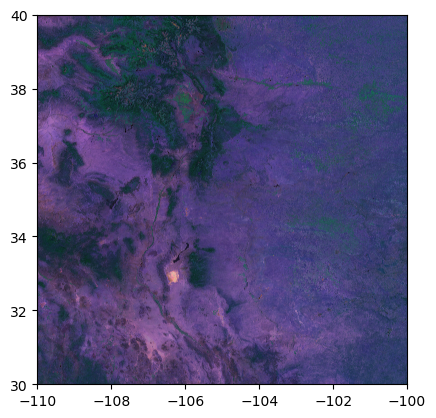

<AxesSubplot: >

In [47]:
# this takes quite a while to run - just a note of caution -
show(satdat)

In [48]:
# Output a min & max pixel value in each band.

for band in [red, nir, swir5, swir7]:
    print("min {min} max {max}".format(min=band.min(), max=band.max()))

min 0 max 255
min 0 max 245
min 0 max 255
min 0 max 255


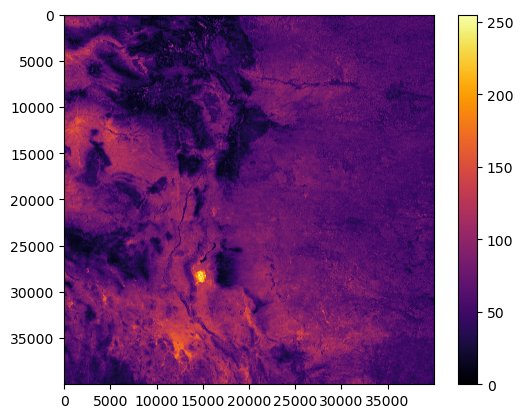

In [34]:
# Plotting a single band - 
# this also takes forever to run ->

fig = plt.imshow(red)
fig.set_cmap('inferno')
plt.colorbar()